In [172]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.ensemble import RandomForestRegressor
data=[]
data_test=[]
if os.path.exists("./horse-colic.data"):
    with open("./horse-colic.data","r") as horse:
        horse_data=horse.readline()
        horse_data = horse_data.strip('\n')
        while horse_data:
            horse_data = horse_data.strip('\n')
            data.append(horse_data.split(" "))
            horse_data=horse.readline()

In [173]:
if os.path.exists("./horse-colic.test"):
    with open("./horse-colic.test","r") as horse:
        horse_data=horse.readline()
        horse_data = horse_data.strip('\n')
        while horse_data:
            horse_data = horse_data.strip('\n')
            data_test.append(horse_data.split(" "))
            horse_data=horse.readline()

In [174]:
columns=["手术","年龄"
         ,"医院编号","直肠温度"
         ,"脉冲","呼吸频率","肢体温度"
         ,"外围脉冲","粘膜"
         ,"毛细管补充时间","疼痛-主观判断马的疼痛程度"
         ,"蠕动","腹胀","鼻胃管"
         ,"鼻胃管回流","鼻胃返流PH"
         ,"直肠检查-粪便","腹部"
         ,"充盈细胞体积","总蛋白","腹腔"
         ,"腹部穿刺总蛋白质","结果"
         ,"外科病变","病变类型1","病变类型2","病变类型3","病理数据"]
len(columns)

28

In [175]:
data=pd.DataFrame(data,dtype="float").iloc[:,:-1]
data_test=pd.DataFrame(data_test,dtype="float").iloc[:,:-1]

In [176]:
data.columns=columns
data_test.columns=columns

In [177]:
data[data=="?"]=np.nan
data_test[data_test=="?"]=np.nan

E:\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [178]:
data.drop("医院编号",inplace=True,axis=1)
data_test.drop("医院编号",inplace=True,axis=1)        

In [179]:
X_train=data.iloc[:,:21]
X_test=data_test.iloc[:,:21]
Y_train=data.iloc[:,21]
Y_test=data_test.iloc[:,21]

In [180]:
for i in X_train.columns:
    X_train.loc[:,i]=X_train.loc[:,i].fillna(X_train.loc[:,i].median())
    X_test.loc[:,i]=X_test.loc[:,i].fillna(X_test.loc[:,i].median())

In [181]:
Y_train=Y_train.fillna(Y_train.median())
Y_test=Y_test.fillna(Y_test.median())

In [182]:
Y_train=Y_train.astype(float)
Y_test=Y_test.astype(float)

In [183]:
Y_train[Y_train==3]=2
Y_test[Y_test==3]=2

In [195]:
accuracy_train_l2=[]
accuracy_test_l2=[]
accuracy_train_l1=[]
accuracy_test_l1=[]
#调整参数C
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in np.linspace(0.05,1,20):
    lrl2=LR(penalty="l2",max_iter=50,C=i,solver="liblinear")
    lrl1=LR(penalty="l1",max_iter=50,C=i,solver="liblinear")
    accuracy_train_l2.append(accuracy_score(lrl2.predict(X_train),Y_train))
    accuracy_test_l2.append(accuracy_score(lrl2.predict(X_test),Y_test))
    accuracy_train_l1.append(accuracy_score(lrl1.predict(X_train),Y_train))
    accuracy_test_l1.append(accuracy_score(lrl1.predict(X_test),Y_test))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

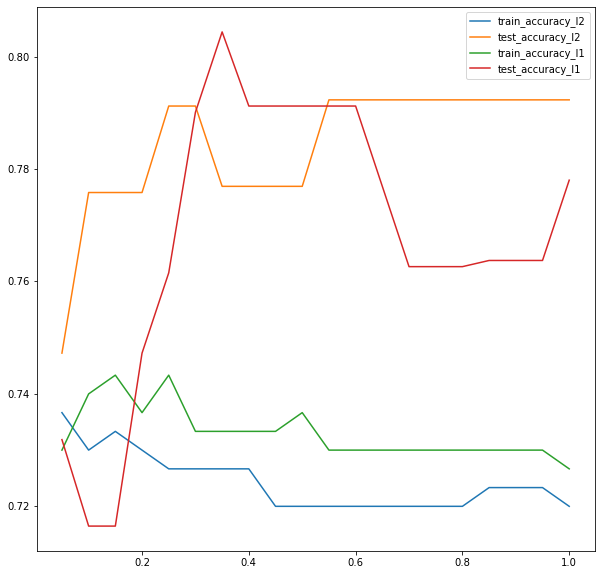

In [192]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0.05,1,20),accuracy_train_l2,label="train_accuracy_l2")
plt.plot(np.linspace(0.05,1,20),accuracy_test_l2,label="test_accuracy_l2")
plt.plot(np.linspace(0.05,1,20),accuracy_train_l1,label="train_accuracy_l1")
plt.plot(np.linspace(0.05,1,20),accuracy_test_l1,label="test_accuracy_l1")
plt.legend()
plt.show()

In [194]:
from sklearn.preprocessing import  StandardScaler
X_train=StandardScaler().fit_transform(X_train,Y_train)
X_test=StandardScaler().fit_transform(X_test,Y_test)
rl1=LR(penalty="l1",max_iter=50,C=0.9,solver="liblinear").fit(X_train,Y_train)
rl1.score(X_train,Y_train)

0.7733333333333333

In [136]:
rl1.score(X_test,Y_test)

0.7794117647058824

In [137]:
np.arange(10,500,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])